In [1]:
%load_ext heat

## Part 1

After 80 we have 353274 fish


C:\Users\staff\anaconda3\lib\site-packages\pyheat\pyheat.py:158: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_yticklabels(row_labels, minor=False)


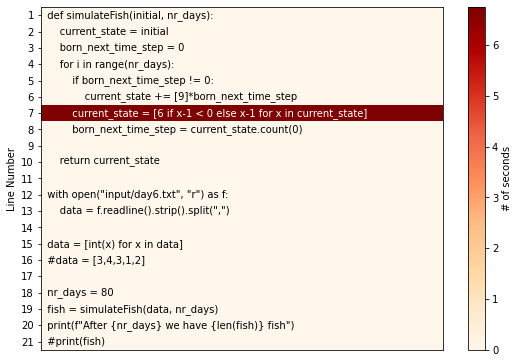

In [2]:
%%heat
def simulateFish(initial, nr_days):
    current_state = initial
    born_next_time_step = 0
    for i in range(nr_days):
        if born_next_time_step != 0:
            current_state += [9]*born_next_time_step
        current_state = [6 if x-1 < 0 else x-1 for x in current_state]
        born_next_time_step = current_state.count(0)
        
    return current_state
    
with open("input/day6.txt", "r") as f:
    data = f.readline().strip().split(",")

data = [int(x) for x in data]
#data = [3,4,3,1,2]

nr_days = 80
fish = simulateFish(data, nr_days)
print(f"After {nr_days} we have {len(fish)} fish")
#print(fish)

## Part 2
Realized that my solution in part 1 is too slow and grows exponentially when the number of days increase.  
Since we know the distinct categories of fish (time till spawning new fish), we only have to keep track of how many fish are in each category.  
Hence I saw that we can use key value pairs (dictionaries) instead, which seems to be a common theme for advent of code

After 256 we have 1609314870967 fish


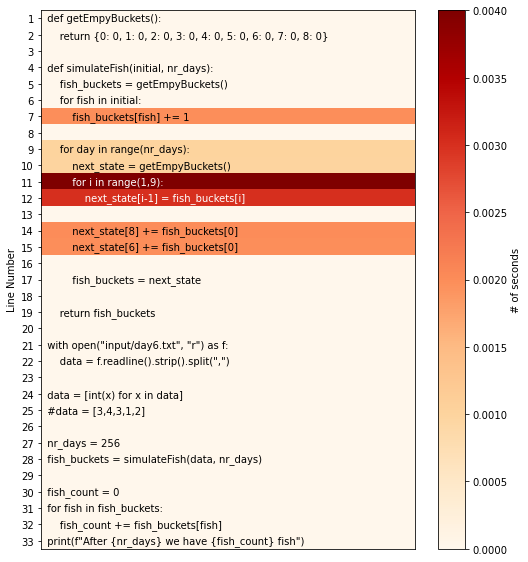

In [3]:
%%heat
def getEmpyBuckets():
    return {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}

def simulateFish(initial, nr_days):
    fish_buckets = getEmpyBuckets()
    for fish in initial:
        fish_buckets[fish] += 1
    
    for day in range(nr_days):
        next_state = getEmpyBuckets()
        for i in range(1,9):
            next_state[i-1] = fish_buckets[i]
        
        next_state[8] += fish_buckets[0]
        next_state[6] += fish_buckets[0]
        
        fish_buckets = next_state
        
    return fish_buckets

with open("input/day6.txt", "r") as f:
    data = f.readline().strip().split(",")

data = [int(x) for x in data]
#data = [3,4,3,1,2]

nr_days = 256
fish_buckets = simulateFish(data, nr_days)

fish_count = 0
for fish in fish_buckets:
    fish_count += fish_buckets[fish]
print(f"After {nr_days} we have {fish_count} fish")